<a href="https://colab.research.google.com/github/rimosh58/TU_math_2022/blob/main/Chap03_Cm_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame
from sklearn import linear_model

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()

import requests, zipfile
from io import StringIO
import io

%matplotlib inline

%precision 3

'%.3f'

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip"

r = requests.get(url, stream=True)

z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [ ]:
student_data_math = pd.read_csv("student-mat.csv", sep=";")
student_data_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


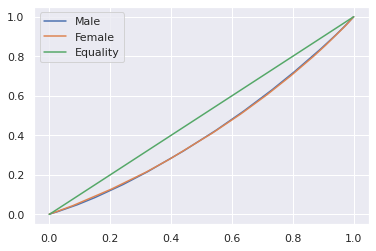

In [115]:
# 3-2-1
math_M = student_data_math[student_data_math["sex"] == "M"]
math_F = student_data_math[student_data_math["sex"] == "F"]
math_Ms = math_M.sort_values(by = "G1")
math_Fs = math_F.sort_values(by = "G1")

# 累積比率の計算
math_Ms["math_G1_cumsum"] = math_Ms["G1"].cumsum() / math_Ms["G1"].sum()
math_Fs["math_G1_cumsum"] = math_Fs["G1"].cumsum() / math_Fs["G1"].sum()

math_Ms["math_M_len"] = np.array(range(len(math_Ms)))
math_Fs["math_F_len"] = np.array(range(len(math_Fs)))

math_Ms["math_sex_cumsum"] = math_Ms["math_M_len"] / max(math_Ms["math_M_len"])
math_Fs["math_sex_cumsum"] = math_Fs["math_F_len"] / max(math_Fs["math_F_len"])

# ローレンツ曲線を描画
plt.plot(math_Ms["math_sex_cumsum"], math_Ms["math_G1_cumsum"], label = "Male")
plt.plot(math_Fs["math_sex_cumsum"], math_Fs["math_G1_cumsum"], label = "Female")
plt.plot([0, 1], [0, 1], label="Equality")
plt.legend()
plt.grid(1)

In [156]:
# 3-2-2
def gini(data):
  u = data.mean()
  n = len(data)
  denom = 2 * (n**2) * u

  data_sum = .0
  for i in data:
    for j in data:
      data_sum += np.abs(i - j)

  gini = data_sum / denom
  return gini

M_gini = gini(math_Ms["G1"])
F_gini = gini(math_Fs["G1"])

print("男性のジニ係数:", M_gini)
print("女性のジニ係数:", F_gini)

男性のジニ係数: 0.17197351667939903
女性のジニ係数: 0.1723782950865341
